In [ ]:
%load_ext sql
%sql ibm_db_sa://

In [ ]:
import pandas
chicago_socioeconomic_data = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
%sql PERSIST chicago_socioeconomic_data

In [76]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [77]:
#no. of rows
%sql select count(*) from chicago_socioeconomic_data

 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
78


In [14]:
#no. area where hardship is greaer than 50
%sql select count(community_area_name) from chicago_socioeconomic_data where hardship_index >50.0

 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
38


In [26]:
#maximum harship index value
%sql select max(hardship_index) from chicago_socioeconomic_data

 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


1
98.0


In [27]:
#area name with max harship index
%sql select community_area_name from chicago_socioeconomic_data where hardship_index=(select max(hardship_index) from chicago_socioeconomic_data)

 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


In [28]:
#area name income greater than $60000
%sql select community_area_name from chicago_socioeconomic_data where per_capita_income_>60000

 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


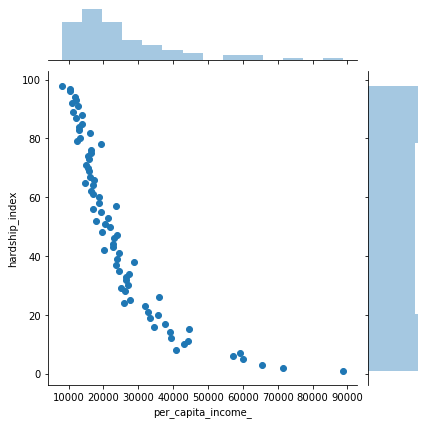

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


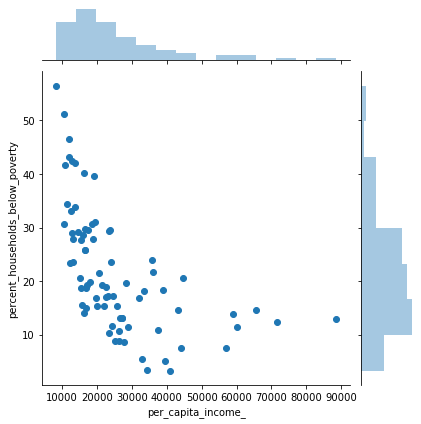

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
income_vs_poverty = %sql SELECT per_capita_income_, percent_households_below_poverty FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='percent_households_below_poverty', data=income_vs_poverty.DataFrame())

 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


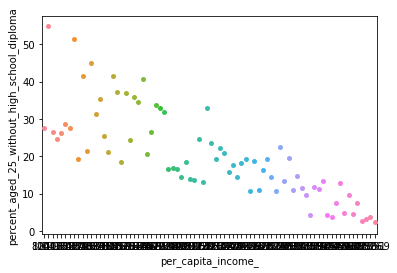

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
income_vs_uneducated = %sql SELECT per_capita_income_,percent_aged_25_without_high_school_diploma FROM chicago_socioeconomic_data;
plot = sns.swarmplot(x='per_capita_income_',y='percent_aged_25_without_high_school_diploma', data=income_vs_uneducated.DataFrame())


In [67]:
df=pandas.DataFrame(chicago_socioeconomic_data)
df['hardship_index'].describe()

count    77.000000
mean     49.506494
std      28.690556
min       1.000000
25%      25.000000
50%      50.000000
75%      74.000000
max      98.000000
Name: hardship_index, dtype: float64

 * ibm_db_sa://skz14973:***@dashdb-txn-sbox-yp-lon02-02.services.eu-gb.bluemix.net:50000/BLUDB
Done.


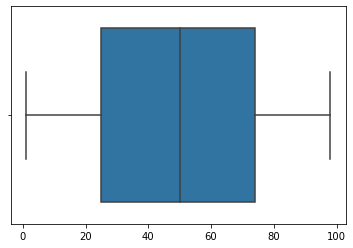

In [71]:
hard= %sql SELECT hardship_index FROM chicago_socioeconomic_data;
plot=sns.boxplot(hard.DataFrame())

In [72]:
df['hardship_index'].idxmax()

53

In [68]:
df.at[53,'community_area_name']

'Riverdale'